### Pre-procesado de los datos:
- Análisis Exploratorio de los datos
- Gestión de Outliers
- Gestión de Missing Values

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
try:
    drive.mount('/content/drive')
except ValueError:
    # If already mounted, this will pass
    pass

Mounted at /content/drive


Carga del conjunto de datos:

In [3]:
ruta = '/content/drive/MyDrive/Colab Notebooks/TFM_en_colab'

In [4]:
data = pd.read_csv(ruta + '/dataset_port_drugs.csv', sep=',')

<ipython-input-4-988e4ba54801>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(ruta + '/dataset_port_drugs.csv', sep=',')


In [5]:
data.columns

Index(['Port hub', 'latitude', 'longitude', 'Major/Minor ports', 'Year',
       'Loaded InBound DOMESTIC', 'Empty InBound DOMESTIC',
       'Loaded OutBound DOMESTIC', 'Empty OutBound DOMESTIC', 'Total DOMESTIC',
       'Loaded InBound FOREIGN', 'Loaded OutBound  FOREIGN',
       'Total OutBound  FOREIGN', 'Total Loaded Grand', 'Drug Type',
       'Count of Event', 'Sum Qty (kg)', 'Sum Qty (lbs)', 'Component',
       'Region', 'Land Filter'],
      dtype='object')

Convertir a wide dataset

In [ ]:
# Columnas que queremos conservar en la estructura final
# columns_to_keep = [
#     'Port hub', 'Year', 'latitude', 'longitude', 'Major/Minor ports',
#     'Loaded InBound DOMESTIC', 'Empty InBound DOMESTIC',
#     'Loaded OutBound DOMESTIC', 'Empty OutBound DOMESTIC', 'Total DOMESTIC',
#     'Loaded InBound FOREIGN', 'Loaded OutBound  FOREIGN',
#     'Total OutBound  FOREIGN', 'Total Loaded Grand'
# ]

In [6]:
columns_to_keep = ['Port hub', 'Year', 'latitude', 'longitude']

In [7]:
# Pivot a formato wide
dataset_wide = pd.pivot_table(
    data = data,
    index=columns_to_keep,
    columns='Drug Type',
    values=['Count of Event', 'Sum Qty (kg)', 'Sum Qty (lbs)'],
    aggfunc='sum',
    fill_value=None  # 🔹 Esto evita que se rellene con 0.0
)



In [8]:
# Renombrar columnas (quita la multi-índice)
dataset_wide.columns = [f"{col[0]}_{col[1]}" for col in dataset_wide.columns]
dataset_wide.reset_index(inplace=True)

Tenemos la version wide de la tabla (porthub, year) con datos de drogas.
Falta la version wide de la tabla (porthub, year) con datos de cargamento de mercancías.

In [10]:
# Pivot a formato wide
dataset_2 = data.loc[:,['Port hub', 'latitude', 'longitude', 'Major/Minor ports', 'Year',
       'Loaded InBound DOMESTIC', 'Empty InBound DOMESTIC',
       'Loaded OutBound DOMESTIC', 'Empty OutBound DOMESTIC', 'Total DOMESTIC',
       'Loaded InBound FOREIGN', 'Loaded OutBound  FOREIGN',
       'Total OutBound  FOREIGN', 'Total Loaded Grand','Component',
       'Region', 'Land Filter']]

In [11]:
dataset_2.drop_duplicates(inplace=True)

In [12]:
dataset_input = dataset_2.merge(dataset_wide, on = columns_to_keep)

In [19]:
# dataset_input.memory_usage
dataset_input.shape

(509, 110)

In [22]:
dataset_2.shape

(1483, 17)

In [23]:
dataset_2

,Port hub,latitude,longitude,Major/Minor ports,Year,Loaded InBound DOMESTIC,Empty InBound DOMESTIC,Loaded OutBound DOMESTIC,Empty OutBound DOMESTIC,Total DOMESTIC,Loaded InBound FOREIGN,Loaded OutBound FOREIGN,Total OutBound FOREIGN,Total Loaded Grand,Component,Region,Land Filter
0,"baltimore, md, filadelfia, pa",39.162017,-76.084075,NaN,2018.0,6450.00,182.2,4294.50,1235.15,12161.85,478038.96,224407.04,702446.00,713190.500,Office of Field Operations,Coastal/Interior,Other
15,"baltimore, md, filadelfia, pa",39.162017,-76.084075,NaN,2019.0,10515.75,564.8,10145.25,1603.90,22829.70,499604.08,220148.93,719753.01,740414.010,Office of Field Operations,Coastal/Interior,Other
96,"baltimore, md, filadelfia, pa",39.162017,-76.084075,NaN,2020.0,301.00,0.0,158.00,0.00,459.00,524197.03,205329.45,729526.48,729985.480,Office of Field Operations,Coastal/Interior,Other
166,"baltimore, md, filadelfia, pa",39.162017,-76.084075,NaN,2021.0,26483.00,0.0,18239.00,0.00,44722.00,486108.38,231060.82,717169.20,761891.200,Office of Field Operations,Coastal/Interior,Other
253,"baltimore, md, filadelfia, pa",39.162017,-76.084075,NaN,2022.0,35993.00,774.4,23096.25,6309.50,66173.15,521729.16,210043.67,731772.83,790862.080,Office of Field Operations,Coastal/Interior,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162642,Northern Ireland,54.628028,-5.890139,Major port,2020.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,3199.101,NaN,NaN,NaN
162643,Northern Ireland,54.628028,-5.890139,Major port,2021.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,3612.913,NaN,NaN,NaN
162644,Northern Ireland,54.628028,-5.890139,Major port,2022.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,3239.924,NaN,NaN,NaN
162645,Northern Ireland,54.628028,-5.890139,Major port,2023.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,3150.727,NaN,NaN,NaN


Exploracion de los datos brutos:

In [20]:
# %pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 109.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1b0b2ac54165db3ba9b22eb6e08bebfa85bfd6a306c7dd8e17e0d82a48a02240
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

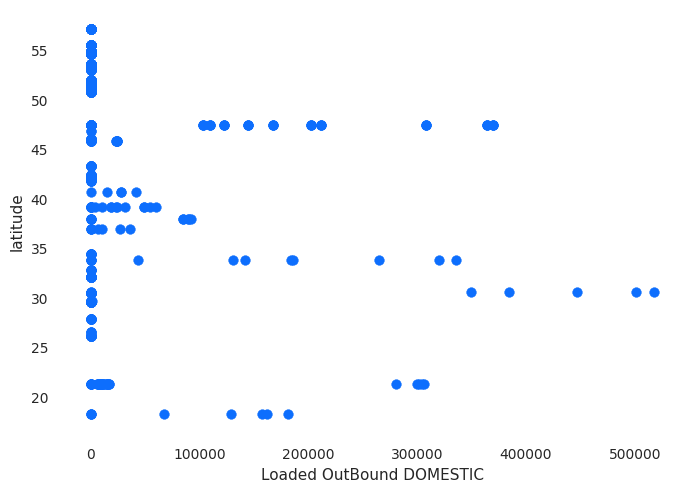

In [35]:
from ydata_profiling import ProfileReport

profile = ProfileReport(dataset_2, title='Datos cargamentos', explorative=True)
# profile.to_notebook_iframe()
profile.to_file(ruta + '/datos_cargamentos.html')

Pre-procesamiento y limpieza de los datos:
- Eliminación de ruido y datos aislados (outliers)
- Eliminación de inconsistencias y duplicados.
- Imputar información faltante

In [16]:
(dataset_input.loc[:,'Loaded InBound DOMESTIC'] == 0).sum()

429

- ¿Qué datos están incompletos?¿Cuáles carecen de valor para el trabajo?
- ¿Cuáles son ruidosos o contienen outliers?
- ¿Cuáles son inconsistentes?
- ¿El tamaño es adecuado?

In [28]:
dataset_cargamento = dataset_2.loc[:,['Loaded InBound DOMESTIC', 'Empty InBound DOMESTIC',
       'Loaded OutBound DOMESTIC', 'Empty OutBound DOMESTIC', 'Total DOMESTIC',
       'Loaded InBound FOREIGN', 'Loaded OutBound  FOREIGN',
       'Total OutBound  FOREIGN', 'Total Loaded Grand']]

In [30]:
zero_threshold = 0.75  # 50% de ceros como umbral
num_columns = dataset_cargamento.shape[1]  # Número total de columnas

dataset_cargamento_nozeros = dataset_cargamento.loc[(dataset_cargamento.eq(0).sum(axis=1) / num_columns) <= zero_threshold]

In [37]:
dataset_cargamento

,Loaded InBound DOMESTIC,Empty InBound DOMESTIC,Loaded OutBound DOMESTIC,Empty OutBound DOMESTIC,Total DOMESTIC,Loaded InBound FOREIGN,Loaded OutBound FOREIGN,Total OutBound FOREIGN,Total Loaded Grand
0,6450.00,182.2,4294.50,1235.15,12161.85,478038.96,224407.04,702446.00,713190.500
15,10515.75,564.8,10145.25,1603.90,22829.70,499604.08,220148.93,719753.01,740414.010
96,301.00,0.0,158.00,0.00,459.00,524197.03,205329.45,729526.48,729985.480
166,26483.00,0.0,18239.00,0.00,44722.00,486108.38,231060.82,717169.20,761891.200
253,35993.00,774.4,23096.25,6309.50,66173.15,521729.16,210043.67,731772.83,790862.080
...,...,...,...,...,...,...,...,...,...
162642,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,3199.101
162643,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,3612.913
162644,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,3239.924
162645,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,3150.727


In [32]:
dataset_cargamento_nozeros.dropna(axis=0, how = 'all', inplace = True)

<ipython-input-32-fcf476049556>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cargamento_nozeros.dropna(axis=0, how = 'all', inplace = True)


In [34]:
dataset_cargamento_nozeros.drop_duplicates()

,Loaded InBound DOMESTIC,Empty InBound DOMESTIC,Loaded OutBound DOMESTIC,Empty OutBound DOMESTIC,Total DOMESTIC,Loaded InBound FOREIGN,Loaded OutBound FOREIGN,Total OutBound FOREIGN,Total Loaded Grand
0,6450.00,182.20,4294.50,1235.15,12161.85,478038.96,224407.04,702446.00,713190.500
15,10515.75,564.80,10145.25,1603.90,22829.70,499604.08,220148.93,719753.01,740414.010
96,301.00,0.00,158.00,0.00,459.00,524197.03,205329.45,729526.48,729985.480
166,26483.00,0.00,18239.00,0.00,44722.00,486108.38,231060.82,717169.20,761891.200
253,35993.00,774.40,23096.25,6309.50,66173.15,521729.16,210043.67,731772.83,790862.080
...,...,...,...,...,...,...,...,...,...
150267,0.00,0.00,0.00,0.00,0.00,7443.74,4699.14,12142.88,14730.489
150375,0.00,0.00,0.00,0.00,0.00,2092.23,1505.75,3597.98,5926.801
151287,9380.10,9233.90,8850.45,8535.55,36000.00,5343.99,1383.38,6727.37,24957.920
151772,8602.60,22099.90,27554.40,5861.60,64118.50,4919.55,2908.94,7828.49,43985.490


In [36]:
profile = ProfileReport(dataset_cargamento_nozeros, title='Datos cargamentos sin ceros', explorative=True)
# profile.to_notebook_iframe()
profile.to_file(ruta + '/datos_cargamentos_nozeros.html')

/usr/local/lib/python3.11/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Limpieza de los datos:
- Corregir datos erróneos
- Filtrar datos incorrectos
- Reducir nivel de detalle innecesario.
- Detectar y resolver discrepancias.

Validación y corrección de los datos:\
Datos estructurados:
- Integridad: requisitos de entereza y validez
- Consistencia: corrección de contradicciones
- Uniformidad: sin irregularidades
- Densidad: cociente de valores omitidos/numero de valores totales
- Unicidad: no existen ni duplicados ni inconsistencias.

Transformación de datos:
- Suavizado: filtrado de ruido de una variable (datos distorsionados y sin sentido dentro del dataset)
- Agregación y resumen: objetos que puedan estar compuestos de otros (de los que tenemos observaciones)
- Discretización:
- Generación de variables:

Atributos redundantes. Aplicar test de chi-cuadrado para variables categóricas. Análisis de correlaciones (o scatterplots) para variables numéricas

Imputación de Missing Values:
- Missing Completely At Random: cuando las características de los sujetos con información son las mismas que las de los sujetos sin información.

- Missing At Random: cuando los sujetos con datos incompletos son diferentes significativamente de los que presentan datos completos en alguna variable. El patrón de ausencia de datos puede ser predecible a partir de variables con datos observados en la base datos del estudio que no muestran ausencia de datos.

- Missing Not At Random: cuando la probabilidad de los MV sobre una variable Y depende de los valores de dicha variable

Cómo tratar MV:
- Eliminar filas
- Eliminar columnas
- Rellenar (imputar su valor)*

In [ ]:
from sklearn import impute

Identificación del ruido:
- Binning: ordenar datos y agrupar en "cubas"
- Clustering: detección de outliers (valores que se quedan fuera). Manejo de boxplots.
- Regresión: dado un conjunto de tuplas, hallar la línea que mejor ajusta a esos datos. Minimizar el error

Para identificar ruido mediante clustering:
- Histogramas y boxplots
- Diagramas Q-Q
- Regla 3xsigma

Otras técnicas (para outliers multivariantes):
- Distancia Mahalanobis
- Reducción de dimensionalidad (PCA, SVD, Análisis Factorial...)

Feature Engineering: selección, transformación y creación de nuevas variables a partir de los datos originales:
- Suavizado de variables ya existentes.
- Discretización de variables numéricas.
- Agrupación de niveles en variables categóricas.
- Normalización de variables numéricas.
- Combinación de variables.

### Modelos de Machine Learning

Determinar la variable objetivo

Minería de datos:
- Seleccionar la tarea
- Seleccionar el algoritmo/s a utilizar
- Usar algoritmos propios

Interpretación de los patrones:
- Interpretación de los resultados obtenidos.
- Exposición de manera clara
- Técnicas de visualización